# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [2]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [3]:
# Пропусков нет
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [4]:
X = data.iloc[:, :3].values
y = data.iloc[:, 3].values.reshape(-1, 1)
X.shape, y.shape

((200, 3), (200, 1))

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [5]:
X_with_ones = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [6]:
X_norm = X_with_ones / np.sqrt(np.sum(np.square(X_with_ones), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [7]:
def coord_descent(X: np.array, 
                  y: np.array,
                  iterations: int=1000) -> np.array:
    """
    Function calculates linear regression coefficients
    using coordinate descent.

    :param X: predictors
    :param y: target variable
    :param iterations: number of iterations
    :return: linear regression coefficients
    """
    m = X.shape[1]
    w = np.zeros((m, 1))
    for i in range(iterations):
        for j in range(m):
            r = y - X @ w
            X_j = X[:, j].reshape(-1, 1)        
            w_j = X_j.T @ (r + w[j]*X_j)
            w[j] = w_j

    return w.flatten()

In [8]:
coord_descent(X_norm, y)

array([ 41.56217205, 110.13144155,  73.52860638,  -0.55006384])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [9]:
model = LinearRegression(fit_intercept=False)
model.fit(X_norm, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [10]:
X_st = (X - X.mean(axis=0)) / X.std(axis=0)

**Добавим единичный столбец**

In [11]:
X_st = np.hstack([np.ones(X_st.shape[0]).reshape(-1, 1), X_st])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [12]:
def mse_error(y: np.array, y_pred: np.array) -> float:
    """
    Function calculates mean squared error.

    :param y: real values of target variable
    :param y_pred: predicted values
    :return: mean squared error
    """
    mse = np.sum((y - y_pred)**2) / y.shape[0]

    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [13]:
y_naive = np.mean(y)
mse_error(y, y_naive)

27.085743750000002

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [14]:
def lin_pred(X: np.array, w: np.array) -> np.array:
    """
    Function calculates predicted values.

    :param X: predictors, shape (n, m)
    :param w: coefficients, shape (m, 1)
    :return: predicted values, shape (n, 1)
    """
    w = w.reshape(-1, 1)
    y_pred = (X_st @ w).reshape(-1, 1)

    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [15]:
def stoch_grad_step(X: np.array, 
                    y: np.array, 
                    w: np.array, 
                    train_ind: int, 
                    eta: float) -> np.array:
    """
    Functon performs step of stochastic gradient descent.

    :param X: predictors
    :param y: target variable
    :param w: coefficients
    :param train_ind: index of train matrix row (X row)
    :param eta: learning rate
    :return: new coefficients
    """
    err = lin_pred(X[train_ind], w) - y[train_ind]
    direc = (2 * X[train_ind] * err[train_ind]) / X.shape[0]
    w_new =  w - direc*eta

    return w_new

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [16]:
def stochastic_gradient_descent(X: np.array, 
                                y: np.array,
                                w: np.array,
                                eta: float,
                                max_iter: int,
                                dist: float) -> tuple[np.array,
                                                      list[float]]:
    """
    Functon performs stochastic gradient descent.

    :param X: predictors
    :param y: target variable
    :param w: coefficients
    :param eta: learning rate
    :param max_iter: maximum number of iterations
    :param dist: threshold for learning termination
    :return: new coefficients, list of MSE
    """
    dist_cur = np.inf
    errors = []
    iter_cur = 0
    w_cur = w

    while dist_cur>dist:
        ind = np.random.randint(X.shape[0])
        y_pred = lin_pred(X[ind], w_cur)
        errors.append(mse_error(y, y_pred))
        w_new = stoch_grad_step(X, y, w_cur, ind, eta)
        dist_cur = np.sqrt(np.sum((w_cur - w_new)**2))
        w_cur = w_new
        iter_cur += 1

        if iter_cur>=max_iter:
            break

    return w_new, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [17]:
w = np.zeros((4))
w_new, mse = stochastic_gradient_descent(X_st, y, w, 0.01, 10**5, 0e-8)

**Постройте график зависимости ошибки от номера итерации**

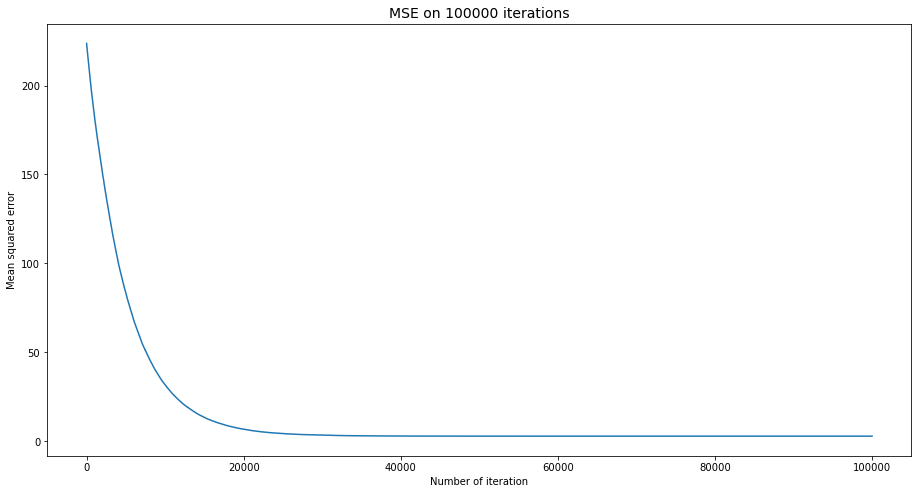

In [21]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1])
plt.plot(range(len(mse)), mse)
ax.set_title(f'MSE on {len(mse)} iterations', fontsize=14)
ax.set_xlabel('Number of iteration')
ax.set_ylabel('Mean squared error');

**Выведите вектор весов, к которому сошелся метод.**

In [22]:
w_new

array([14.01895733,  3.92514522,  2.78271551, -0.03171356])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [23]:
mse[-1]

2.784401636106621

**Выводы**:
- Решение, полученное при самостоятельной реализации координатного спуска для линейной регрессии, совпадает с реализацией линейной регрессии встроенными библиотеками.
- Наивный прогноз дает очень грубый результат.
- Стохастический градиентный спуск достаточно быстро (за небольшое количество итераций) минимизирует ошибку.
- Поскольку в реализации SGD наблюдения выбираются рандомно, количество итераций зависит от начального выбора этих рандомных наблюдений, также как и от подбора шага и необходимой точности.